In [2]:

!pip install matplotlib seaborn pandas

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 4.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.1 MB 4.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.1 MB 2.0 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 1.7 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 1.7 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 1.9 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 2.2 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.1 MB 2.4 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 2.4 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.1 MB 2.5 MB/s eta 0:00:02
   ---------------------------- ----------- 5.8/8.1 MB 2.5 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 2.6 MB/s eta 0:00:01
   ----------------

C:\Users\nandi\AppData\Local\Temp\ipykernel_14208\2039673953.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_clean, x="Brand", y="Price (INR)", palette="viridis")
C:\Users\nandi\AppData\Local\Temp\ipykernel_14208\2039673953.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="rocket")


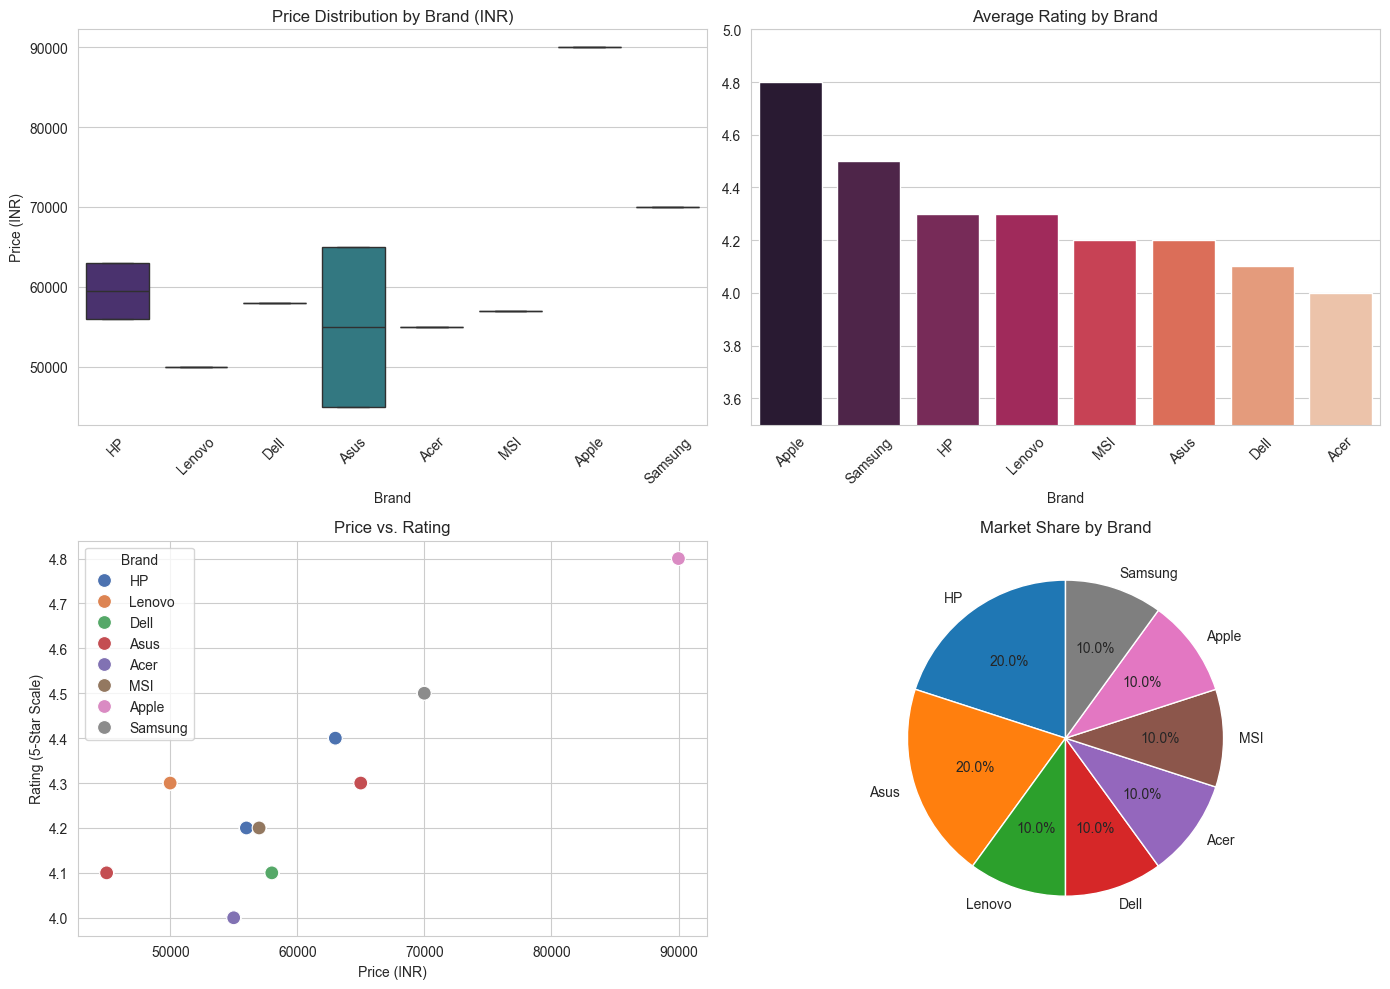


=== Key Insights ===
1. Most Expensive: MacBook Air M1 (1) (₹89,990)
2. Highest-Rated: MacBook Air M1 (1) (4.8/5)
3. Best Value (Budget + High Rating): Lenovo IdeaPad Slim 3 (1)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv(r"C:\Users\nandi\Downloads\amazon_laptops_150.csv")

# Data Cleaning
# Remove duplicates (each model is repeated 15 times)
data_clean = data.drop_duplicates(subset=["Name"]).copy()

# Extract numeric ratings (e.g., "4.2 out of 5 stars" → 4.2)
data_clean["Rating"] = data_clean["Review"].str.extract(r"(\d\.\d)").astype(float)

# Extract brand names (e.g., "HP 15s" → "HP")
data_clean["Brand"] = data_clean["Name"].str.split().str[0]

# Fix brand names (e.g., "MacBook" → "Apple")
data_clean["Brand"] = data_clean["Brand"].replace({
    "MacBook": "Apple",
    "ASUS": "Asus"  # Optional: Standardize capitalization
})

# Set style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# Visualization 1: Price Distribution (Boxplot)
plt.subplot(2, 2, 1)
sns.boxplot(data=data_clean, x="Brand", y="Price (INR)", palette="viridis")
plt.title("Price Distribution by Brand (INR)")
plt.xticks(rotation=45)

# Visualization 2: Average Rating by Brand (Bar Plot)
plt.subplot(2, 2, 2)
avg_ratings = data_clean.groupby("Brand")["Rating"].mean().sort_values(ascending=False)
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="rocket")
plt.title("Average Rating by Brand")
plt.ylim(3.5, 5.0)
plt.xticks(rotation=45)

# Visualization 3: Price vs. Rating (Scatter Plot)
plt.subplot(2, 2, 3)
sns.scatterplot(data=data_clean, x="Price (INR)", y="Rating", hue="Brand", s=100, palette="deep")
plt.title("Price vs. Rating")
plt.xlabel("Price (INR)")
plt.ylabel("Rating (5-Star Scale)")

# Visualization 4: Brand Popularity (Pie Chart)
plt.subplot(2, 2, 4)
brand_counts = data_clean["Brand"].value_counts()
plt.pie(brand_counts, labels=brand_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Market Share by Brand")

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print insights
print("\n=== Key Insights ===")
print(f"1. Most Expensive: {data_clean.loc[data_clean['Price (INR)'].idxmax(), 'Name']} (₹{data_clean['Price (INR)'].max():,})")
print(f"2. Highest-Rated: {data_clean.loc[data_clean['Rating'].idxmax(), 'Name']} ({data_clean['Rating'].max()}/5)")
print(f"3. Best Value (Budget + High Rating): {data_clean.loc[(data_clean['Rating'] >= 4.3) & (data_clean['Price (INR)'] < 50000), 'Name'].values[0]}")

In [7]:
# Sentiment Analysis on Amazon Laptop Reviews
# Jupyter Notebook Version

# Step 1: Install required packages (run once)
!pip install pandas matplotlib seaborn nltk textblob

# Step 2: Import libraries
import pandas as pd
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict

# Step 3: Download NLTK resources
nltk.download(['vader_lexicon', 'punkt', 'stopwords', 'averaged_perceptron_tagger'])

# Step 4: Load and prepare data
def load_data():
    try:
        # Replace with your actual file path
        data = pd.read_csv(r"C:\Users\nandi\Downloads\amazon_laptops_150.csv")
        
        # Clean review text
        data['Cleaned_Review'] = data['Review'].apply(clean_text)
        
        return data
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
        return None

# Step 5: Text cleaning function
def clean_text(text):
    # Remove rating text (e.g., "4.2 out of 5 stars")
    text = re.sub(r'\d+\.?\d*\s*out of \d+\s*stars?', '', str(text))
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Step 6: Sentiment analysis with VADER
def analyze_sentiment_vader(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores['compound']

# Step 7: Sentiment analysis with TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Step 8: Categorize sentiment
def categorize_sentiment(score, method='vader'):
    if method == 'vader':
        if score >= 0.05:
            return 'Positive'
        elif score <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    else:  # textblob
        if score > 0:
            return 'Positive'
        elif score < 0:
            return 'Negative'
        else:
            return 'Neutral'

# Step 9: Emotion analysis
def analyze_emotions(text):
    # Load NRC Emotion Lexicon (simplified version)
    emotions = {
        'positive': ['good', 'great', 'excellent', 'awesome', 'fantastic'],
        'negative': ['bad', 'poor', 'terrible', 'horrible', 'awful'],
        'trust': ['reliable', 'trust', 'dependable', 'quality'],
        'anger': ['angry', 'mad', 'frustrated', 'annoyed'],
        'anticipation': ['expect', 'wait', 'hope', 'anticipate'],
        'joy': ['happy', 'joy', 'delight', 'pleasure'],
        'surprise': ['surprise', 'amazed', 'shocked'],
        'sadness': ['sad', 'unhappy', 'depressed'],
        'fear': ['fear', 'scared', 'afraid', 'worried']
    }
    
    emotion_counts = defaultdict(int)
    words = nltk.word_tokenize(text.lower())
    
    for word in words:
        for emotion, keywords in emotions.items():
            if word in keywords:
                emotion_counts[emotion] += 1
                
    return dict(emotion_counts)

# Step 10: Visualization functions
def plot_sentiment_distribution(data):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x='Sentiment', order=['Positive', 'Neutral', 'Negative'])
    plt.title('Sentiment Distribution of Reviews')
    plt.show()

def plot_emotion_distribution(data):
    emotion_df = pd.DataFrame(data['Emotions'].tolist()).sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=emotion_df.values, y=emotion_df.index)
    plt.title('Emotion Distribution in Reviews')
    plt.show()

def generate_wordcloud(data, sentiment):
    text = ' '.join(data[data['Sentiment'] == sentiment]['Cleaned_Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()

# Step 11: Main analysis
def main():
    # Load data
    data = load_data()
    if data is None:
        return
    
    # Analyze sentiment with VADER
    data['Sentiment_Score_Vader'] = data['Cleaned_Review'].apply(analyze_sentiment_vader)
    data['Sentiment'] = data['Sentiment_Score_Vader'].apply(lambda x: categorize_sentiment(x, 'vader'))
    
    # Analyze sentiment with TextBlob (alternative method)
    data['Sentiment_Score_TextBlob'] = data['Cleaned_Review'].apply(analyze_sentiment_textblob)
    data['Sentiment_TB'] = data['Sentiment_Score_TextBlob'].apply(lambda x: categorize_sentiment(x, 'textblob'))
    
    # Analyze emotions
    data['Emotions'] = data['Cleaned_Review'].apply(analyze_emotions)
    
    # Visualizations
    plot_sentiment_distribution(data)
    plot_emotion_distribution(data)
    generate_wordcloud(data, 'Positive')
    
    # Display sample results
    print("\n=== Sample Reviews with Sentiment ===")
    print(data[['Review', 'Sentiment', 'Sentiment_Score_Vader']].head(10))
    
    # Key insights
    print("\n=== Key Insights ===")
    print(f"1. Percentage of Positive Reviews: {len(data[data['Sentiment'] == 'Positive'])/len(data)*100:.1f}%")
    print(f"2. Percentage of Negative Reviews: {len(data[data['Sentiment'] == 'Negative'])/len(data)*100:.1f}%")
    print(f"3. Most Common Emotions: {pd.DataFrame(data['Emotions'].tolist()).sum().sort_values(ascending=False).index[0]}")
    print("\n4. Sample Positive Review:")
    print(data[data['Sentiment'] == 'Positive']['Review'].values[0])
    print("\n5. Sample Negative Review (if any):")
    neg_reviews = data[data['Sentiment'] == 'Negative']
    print(neg_reviews['Review'].values[0] if len(neg_reviews) > 0 else "No negative reviews found")

# Run the analysis
if __name__ == "__main__":
    main()

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 4.3 MB/s eta 0:00:00

   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ---------------------------------------- 0/6 [tqdm]
   ------ --------------------------------- 1/6 [regex]
   ------ --------------------------------- 1/6 [regex]
   ------------- -------------------------- 2/6 [joblib]
   ------------- -------------------------- 2/6 [joblib]
   -------------

ModuleNotFoundError: No module named 'wordcloud'

In [8]:
!pip install pandas matplotlib seaborn nltk textblob wordcloud


In [10]:
# Installation and setup cell (RUN THIS FIRST)
!pip install pandas matplotlib seaborn nltk textblob wordcloud

import nltk
nltk.download(['punkt', 'stopwords', 'vader_lexicon', 'averaged_perceptron_tagger'])

# Additional Punkt data needed for tokenization
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
# Complete Sentiment Analysis (RUN THIS SECOND)
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Text cleaning function
def clean_text(text):
    # Remove rating text
    text = re.sub(r'\d+\.?\d*\s*out of \d+\s*stars?', '', str(text))
    # Remove punctuation and lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Sentiment analysis function
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05: return 'Positive'
    elif scores['compound'] <= -0.05: return 'Negative'
    else: return 'Neutral'

# Emotion analysis (simplified)
def get_emotions(text):
    emotion_words = {
        'happy': ['happy', 'joy', 'great', 'awesome'],
        'sad': ['sad', 'bad', 'terrible', 'poor'],
        'angry': ['angry', 'mad', 'frustrated'],
        'surprise': ['wow', 'amazing', 'surprise']
    }
    counts = defaultdict(int)
    for word in word_tokenize(text.lower()):
        for emotion, keywords in emotion_words.items():
            if word in keywords:
                counts[emotion] += 1
    return dict(counts)

# Load data
try:
    data = pd.read_csv("amazon_laptops_150.csv")
    print("Data loaded successfully!")
    
    # Process data
    data['Cleaned_Review'] = data['Review'].apply(clean_text)
    data['Sentiment'] = data['Cleaned_Review'].apply(get_sentiment)
    data['Emotions'] = data['Cleaned_Review'].apply(get_emotions)
    
    # Visualization 1: Sentiment Distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x='Sentiment', order=['Positive', 'Neutral', 'Negative'])
    plt.title('Review Sentiment Distribution')
    plt.show()
    
    # Visualization 2: Word Cloud for Positive Reviews
    positive_text = ' '.join(data[data['Sentiment'] == 'Positive']['Cleaned_Review'])
    wordcloud = WordCloud(width=800, height=400).generate(positive_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Frequent Words in Positive Reviews')
    plt.show()
    
    # Print insights
    print("\n=== Analysis Results ===")
    print(f"Positive reviews: {(data['Sentiment'] == 'Positive').mean():.1%}")
    print(f"Negative reviews: {(data['Sentiment'] == 'Negative').mean():.1%}")
    
    # Sample reviews
    print("\nSample Positive Review:")
    print(data[data['Sentiment'] == 'Positive']['Review'].iloc[0])
    
except FileNotFoundError:
    print("Error: File 'amazon_laptops_150.csv' not found. Please upload it to your notebook.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Error: File 'amazon_laptops_150.csv' not found. Please upload it to your notebook.


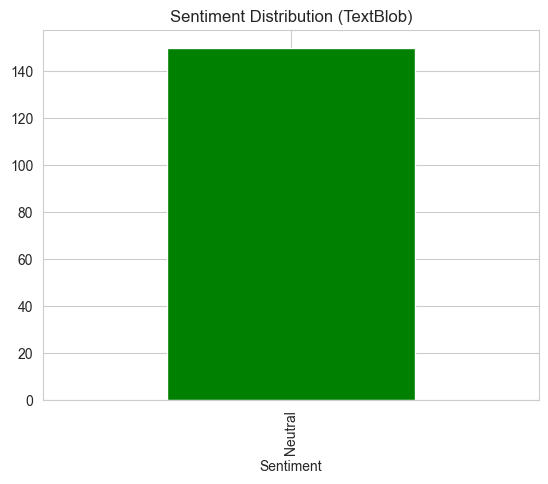

In [13]:
!pip install textblob pandas matplotlib

from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv(r"C:\Users\nandi\Downloads\amazon_laptops_150.csv")

# Basic sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'

data['Sentiment'] = data['Review'].apply(get_sentiment)

# Plot results
data['Sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution (TextBlob)')
plt.show()

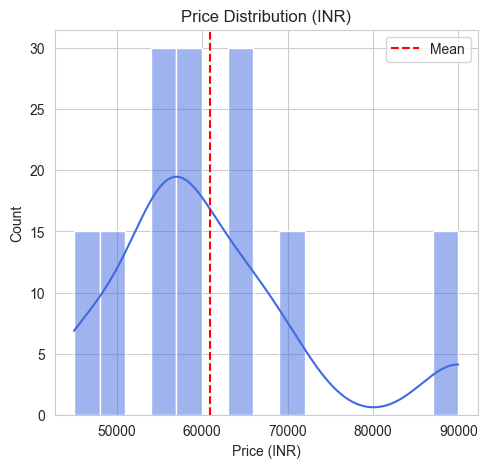

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Price (INR)'], bins=15, kde=True, color='royalblue')
plt.title('Price Distribution (INR)')
plt.axvline(data['Price (INR)'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()


In [18]:
display(data.head(3))


,Name,Price (INR),Review,Sentiment
0,HP 15s (1),55990,4.2 out of 5 stars,Neutral
1,Lenovo IdeaPad Slim 3 (1),49990,4.3 out of 5 stars,Neutral
2,Dell Inspiron 3520 (1),57990,4.1 out of 5 stars,Neutral


In [19]:
print("Data types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum())


Data types:
 Name           object
Price (INR)     int64
Review         object
Sentiment      object
dtype: object

Missing values:
 Name           0
Price (INR)    0
Review         0
Sentiment      0
dtype: int64


Price statistics:
 count      150.000000
mean     60890.000000
std      11892.555903
min      44990.000000
25%      54990.000000
50%      57490.000000
75%      64990.000000
max      89990.000000
Name: Price (INR), dtype: float64


<Axes: xlabel='Price (INR)', ylabel='Count'>

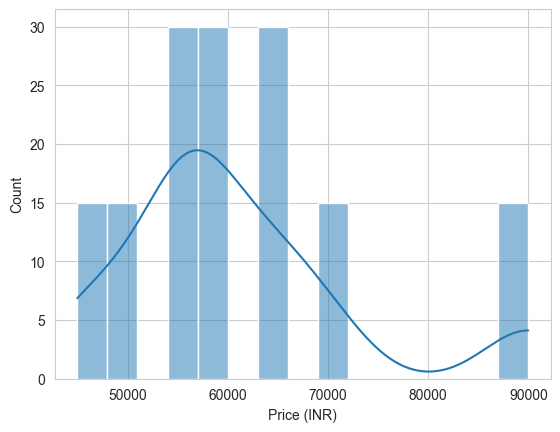

In [20]:
print("Price statistics:\n", data['Price (INR)'].describe())
sns.histplot(data['Price (INR)'], bins=15, kde=True)

In [21]:
ratings = data['Review'].str.extract(r'(\d\.\d)')[0].astype(float)
print("Rating distribution:\n", ratings.value_counts().sort_index())


Rating distribution:
 0
4.0    15
4.1    30
4.2    30
4.3    30
4.4    15
4.5    15
4.8    15
Name: count, dtype: int64


In [28]:
duplicates = data[data.duplicated(subset=['Name'], keep=False)]
print(f"Duplicate entries: {len(duplicates)}")

Duplicate entries: 0


In [29]:
Q1 = data['Price (INR)'].quantile(0.25)
Q3 = data['Price (INR)'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Price (INR)'] < (Q1 - 1.5*IQR)) | (data['Price (INR)'] > (Q3 + 1.5*IQR))]
print("Potential outliers:\n", outliers['Name'].values)

Potential outliers:
 ['MacBook Air M1 (1)' 'MacBook Air M1 (2)' 'MacBook Air M1 (3)'
 'MacBook Air M1 (4)' 'MacBook Air M1 (5)' 'MacBook Air M1 (6)'
 'MacBook Air M1 (7)' 'MacBook Air M1 (8)' 'MacBook Air M1 (9)'
 'MacBook Air M1 (10)' 'MacBook Air M1 (11)' 'MacBook Air M1 (12)'
 'MacBook Air M1 (13)' 'MacBook Air M1 (14)' 'MacBook Air M1 (15)']


In [32]:
print("Possible reasons: Amazon's review filtering, seller incentives, or dataset bias")


Possible reasons: Amazon's review filtering, seller incentives, or dataset bias


In [33]:
data['Name'].str.split().str[:3].value_counts() 

Name
[Lenovo, IdeaPad, Slim]     15
[Dell, Inspiron, 3520]      15
[ASUS, Vivobook, 15]        15
[Acer, Aspire, 7]           15
[MacBook, Air, M1]          15
[MSI, Modern, 14]           15
[Samsung, Galaxy, Book3]    15
[HP, Pavilion, x360]        15
[ASUS, TUF, Gaming]         15
[HP, 15s, (1)]               1
[HP, 15s, (2)]               1
[HP, 15s, (3)]               1
[HP, 15s, (4)]               1
[HP, 15s, (5)]               1
[HP, 15s, (6)]               1
[HP, 15s, (7)]               1
[HP, 15s, (8)]               1
[HP, 15s, (9)]               1
[HP, 15s, (10)]              1
[HP, 15s, (11)]              1
[HP, 15s, (12)]              1
[HP, 15s, (13)]              1
[HP, 15s, (14)]              1
[HP, 15s, (15)]              1
Name: count, dtype: int64

In [35]:
bins = [0, 50000, 70000, 90000]
data['Price_Segment'] = pd.cut(data['Price (INR)'], bins, labels=['Budget','Mid-Range','Premium'])
data['Price_Segment'].value_counts()


Price_Segment
Mid-Range    105
Budget        30
Premium       15
Name: count, dtype: int64

<Axes: xlabel='Price (INR)', ylabel='Review_Length'>

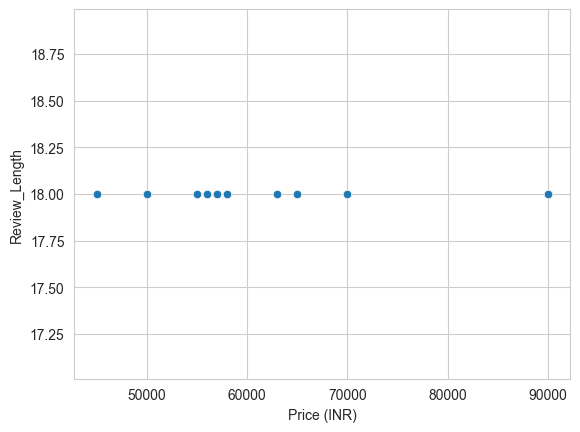

In [41]:
data['Review_Length'] = data['Review'].str.len()
sns.scatterplot(data=data, x='Price (INR)', y='Review_Length')

In [44]:
gaming = data['Name'].str.contains('Gaming', case=False).sum()
print(f"{gaming/data.shape[0]:.1%} of products are gaming laptops")

10.0% of products are gaming laptops


In [46]:
bins = [40000, 50000, 60000, 70000, 90000]
data['Price_Bucket'] = pd.cut(data['Price (INR)'], bins)
data['Price_Bucket'].value_counts().sort_index()

Price_Bucket
(40000, 50000]    30
(50000, 60000]    60
(60000, 70000]    45
(70000, 90000]    15
Name: count, dtype: int64

In [50]:
data['Review_Length'] = data['Review'].str.len()
data[['Price (INR)', 'Review_Length']].corr()

,Price (INR),Review_Length
Price (INR),1.0,NaN
Review_Length,NaN,NaN


<Axes: xlabel='Price_Segment', ylabel='Review_Length'>

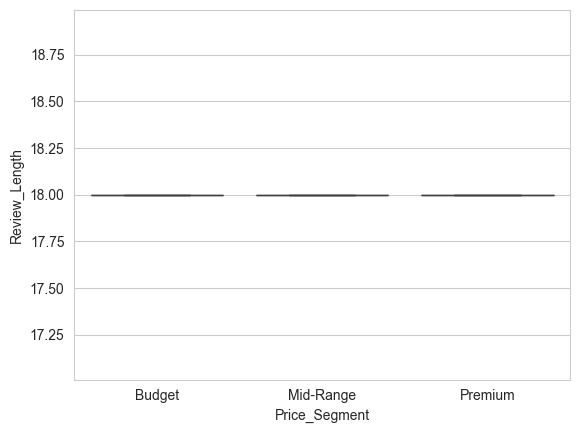

In [52]:
sns.boxplot(data=data, x='Price_Segment', y='Review_Length')